**Problem Statement**

Yulu wants to understand the factors affecting the demand for the shared electric cycles in the Indian market.

What variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands?

In [ ]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

###Exploratory Data Analysis

In [ ]:
#uploading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/aravindk-123/Scaler_Docs/refs/heads/main/bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Shape of the dataset
df.shape

(10886, 12)

In [ ]:
#Columns in the dataset
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Checking Missing Values in the dataset**

In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


**Insights**
- The dataset does not have any missing values, making it easy to work with.

In [ ]:
#Fetching basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Insights**
- From the above information, it is clear that the data has 10886 rows and 12 columns.
- The 11 features of the data is a mix of alpha-numeric data.
- The dataframe occupies 1020.7 KB, which means it is a small dataset.


**Count of Unique Values in Each Column**

In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


**Converting the datetime column to 'datetime' type**

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


**Converting Categorical Variables to Category Datatype**

Four columns - season, holiday, workingday and weather are converted to 'category' for efficient and faster operations.

In [ ]:
categorical_data = ['season','holiday','workingday','weather']
for col in categorical_data:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


**Statistical Summary of the Dataset**

In [ ]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Finding the Timeperiod for which data is given**

In [ ]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [ ]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [ ]:
#Total number of days data present
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

**Insights**

The data is spread over 718 days (approximately 2 years).

**Adding Column for Season to make it more understandeable**

In [ ]:
def season_category(x):
  if x == 1:
    return 'spring'
  elif x == 2:
    return 'summer'
  elif x == 3:
    return 'fall'
  else:
    return 'winter'
df['season_name'] = df['season'].apply(season_category)
df[['season_name']].head()

,season_name
0,spring
1,spring
2,spring
3,spring
4,spring


**Insights**

- All seasons have an average temperature of 25.11, except for Spring, which has a slightly lower average of 24.67

###Univariate Analysis



**Analysis based on count plot/ (histplot+kde) and box plot based on certain columns**

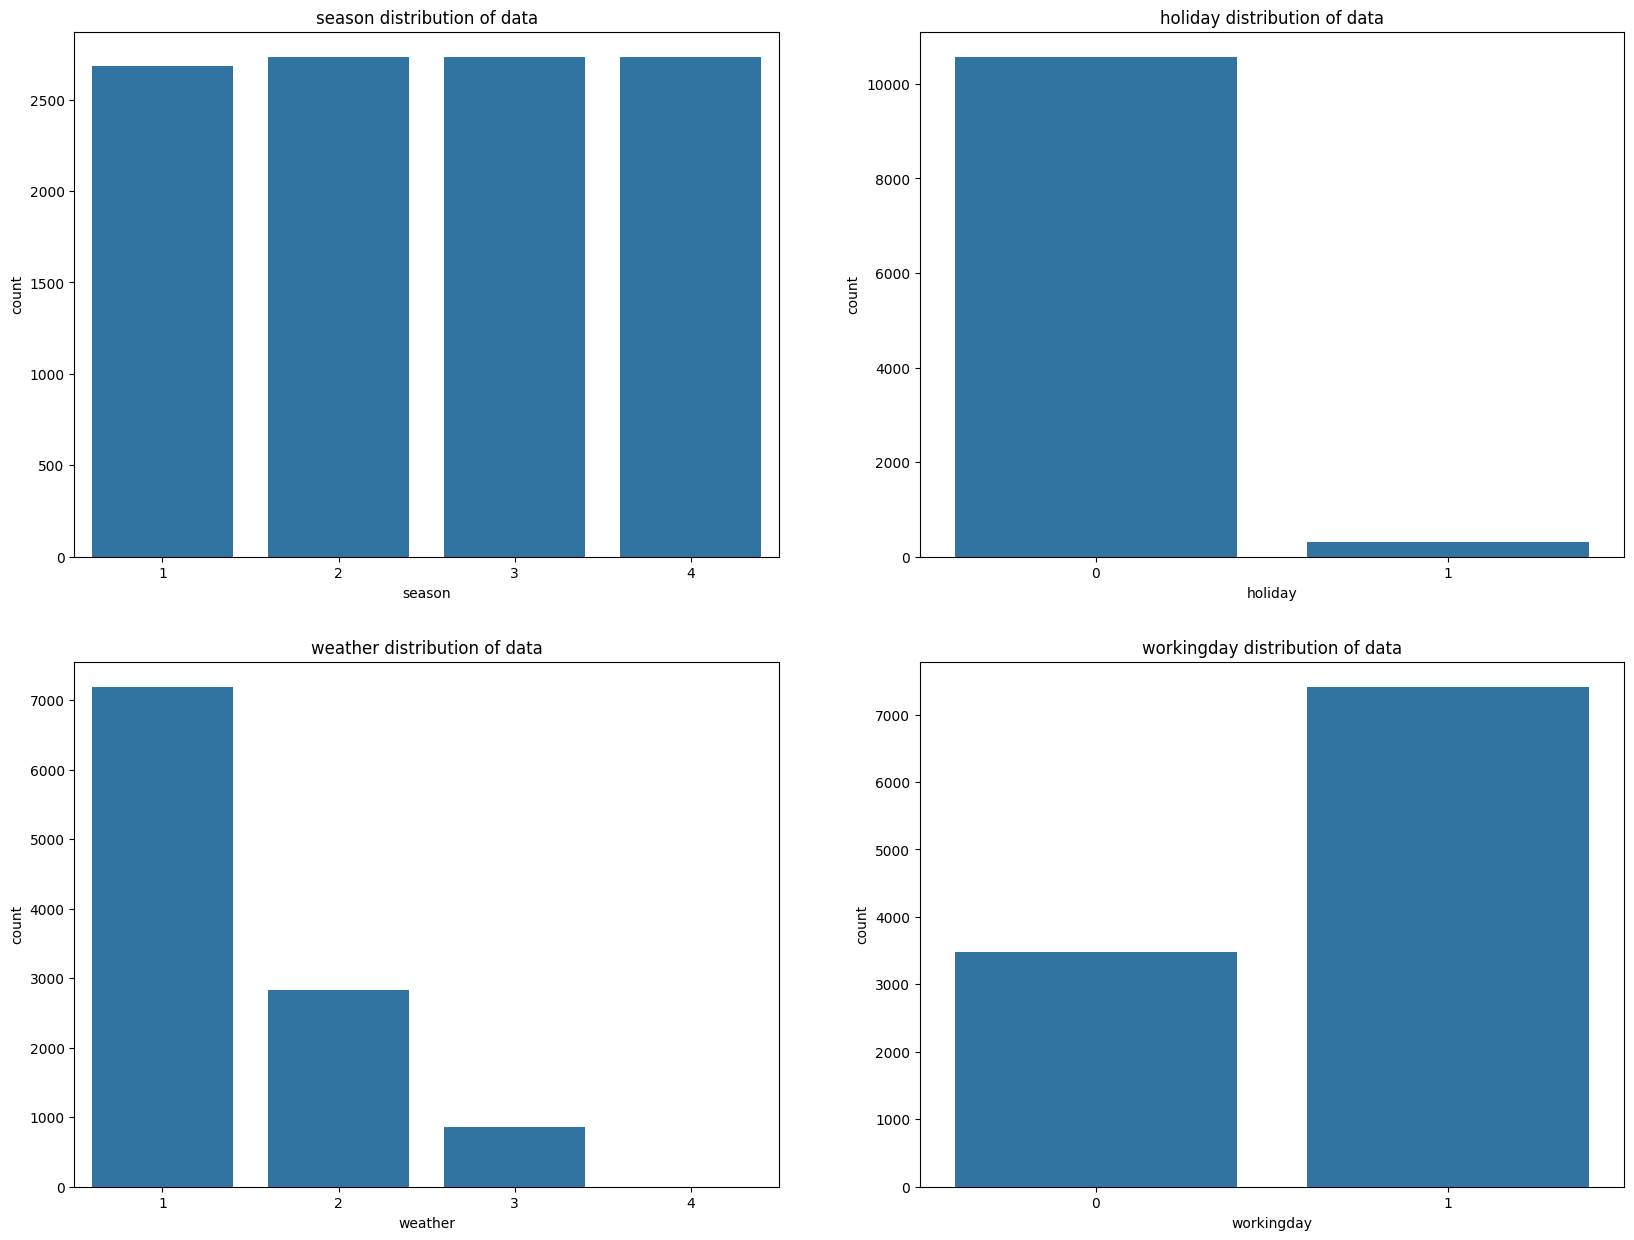

In [ ]:
plt.figure(figsize=(20,15))
columns1 = ['season','holiday','weather', 'workingday']
count =1
for col in columns1:
  plt.subplot(2,2,count)
  count = count + 1
  plt.title(f"{col} distribution of data")
  sns.countplot(data=df, x = col)

plt.show()

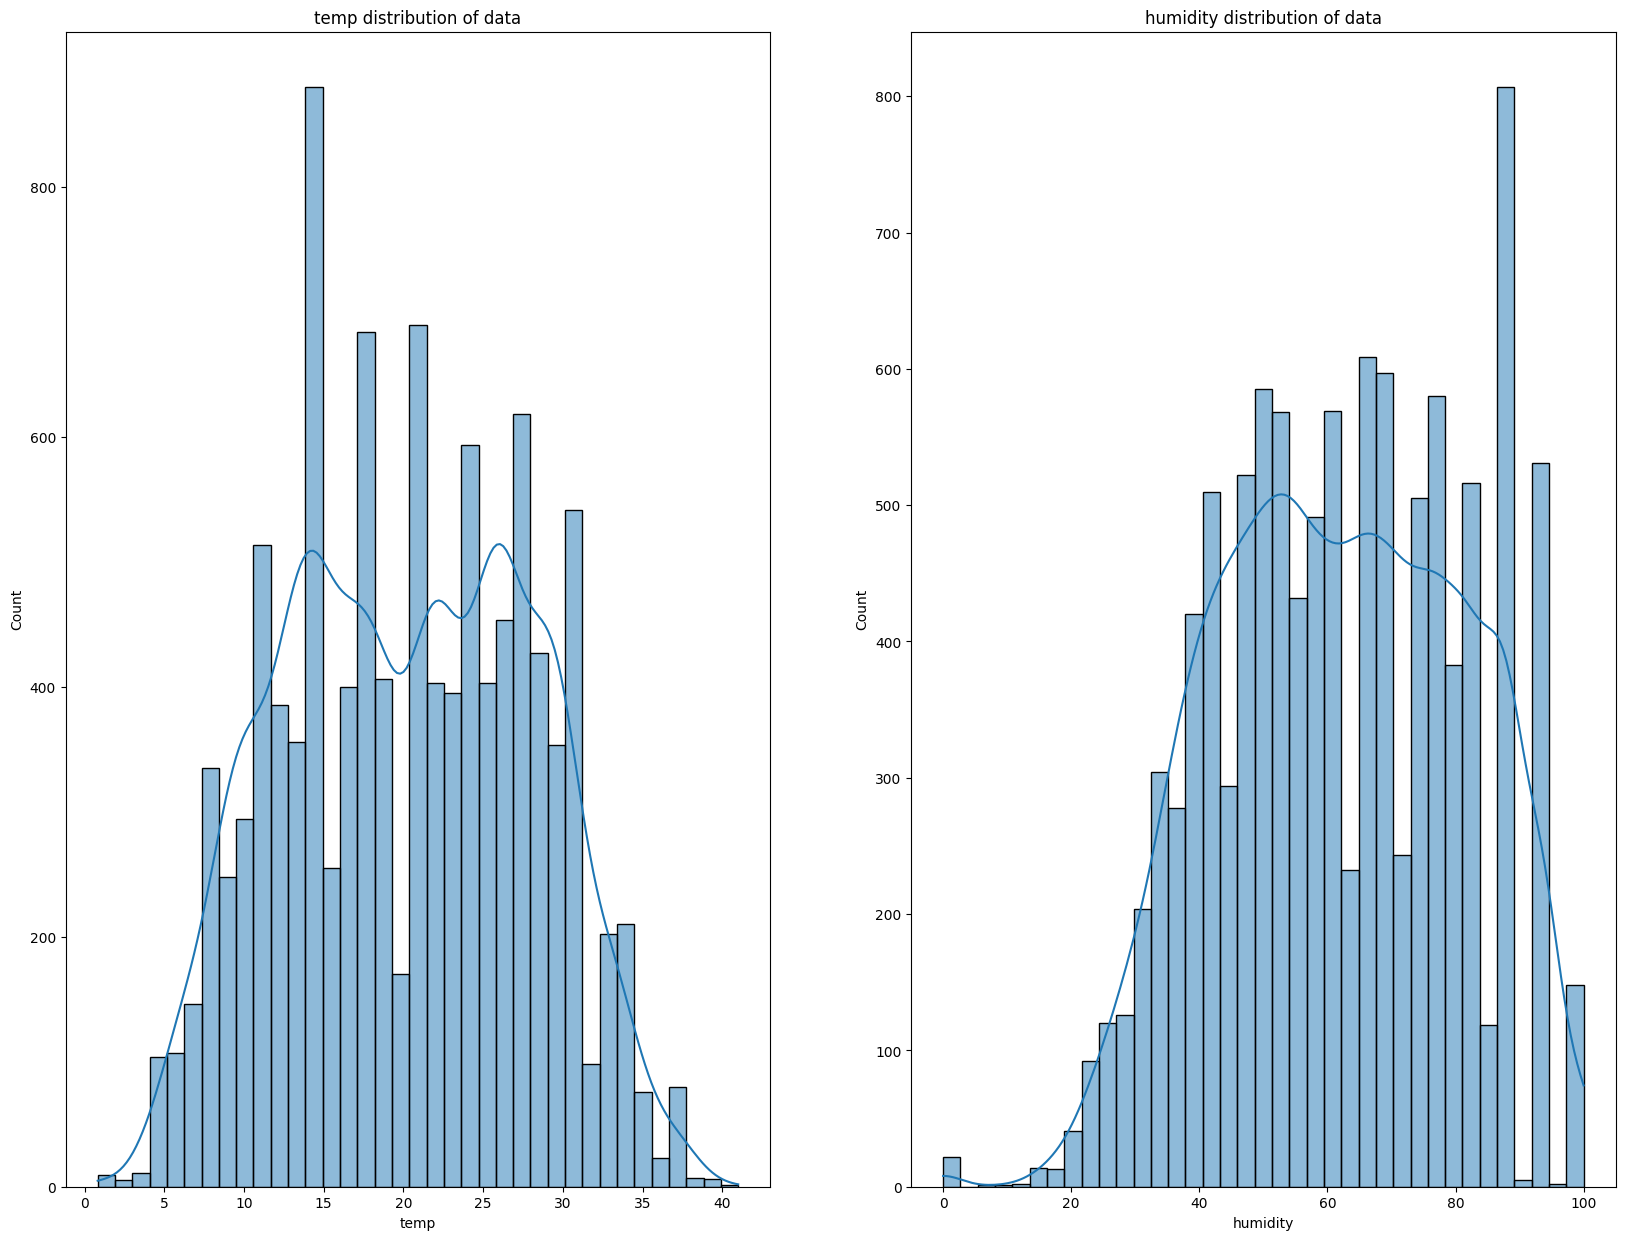

In [ ]:
plt.figure(figsize=(20,15))
columns1 = ['temp','humidity']
count=1
for col in columns1:
  plt.subplot(1,2,count)
  count = count + 1
  plt.title(f"{col} distribution of data")
  sns.histplot(data=df, x = col, kde=True)

plt.show()

**Insights**
- Season 4 has the highest demand (2734), followed closely by seasons 2 and 3. Season 1 has a slightly lower demand (2686).
- Rentals peak between 14.76°C and 28.70°C, with extreme temperatures causing reduced bike rentals.
- Non-holidays dominate (10575) compared to infrequent holidays (311), guiding staffing and marketing strategies.
- Higher humidity levels (e.g., 88, 94) correlate with increased bike rentals, offering potential for service optimization.
- Clear weather prevails (1), followed by cloudy (2) and light rain (3), suggesting adaptation of services based on weather conditions.
- More rentals occur on working days (7412) than weekends (3474), indicating a commuter trend for daily commuting.
- More than 80 % of the time, the temperature is less than 28 degrees celcius.
- More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

**Box Plot Outlier Detection**

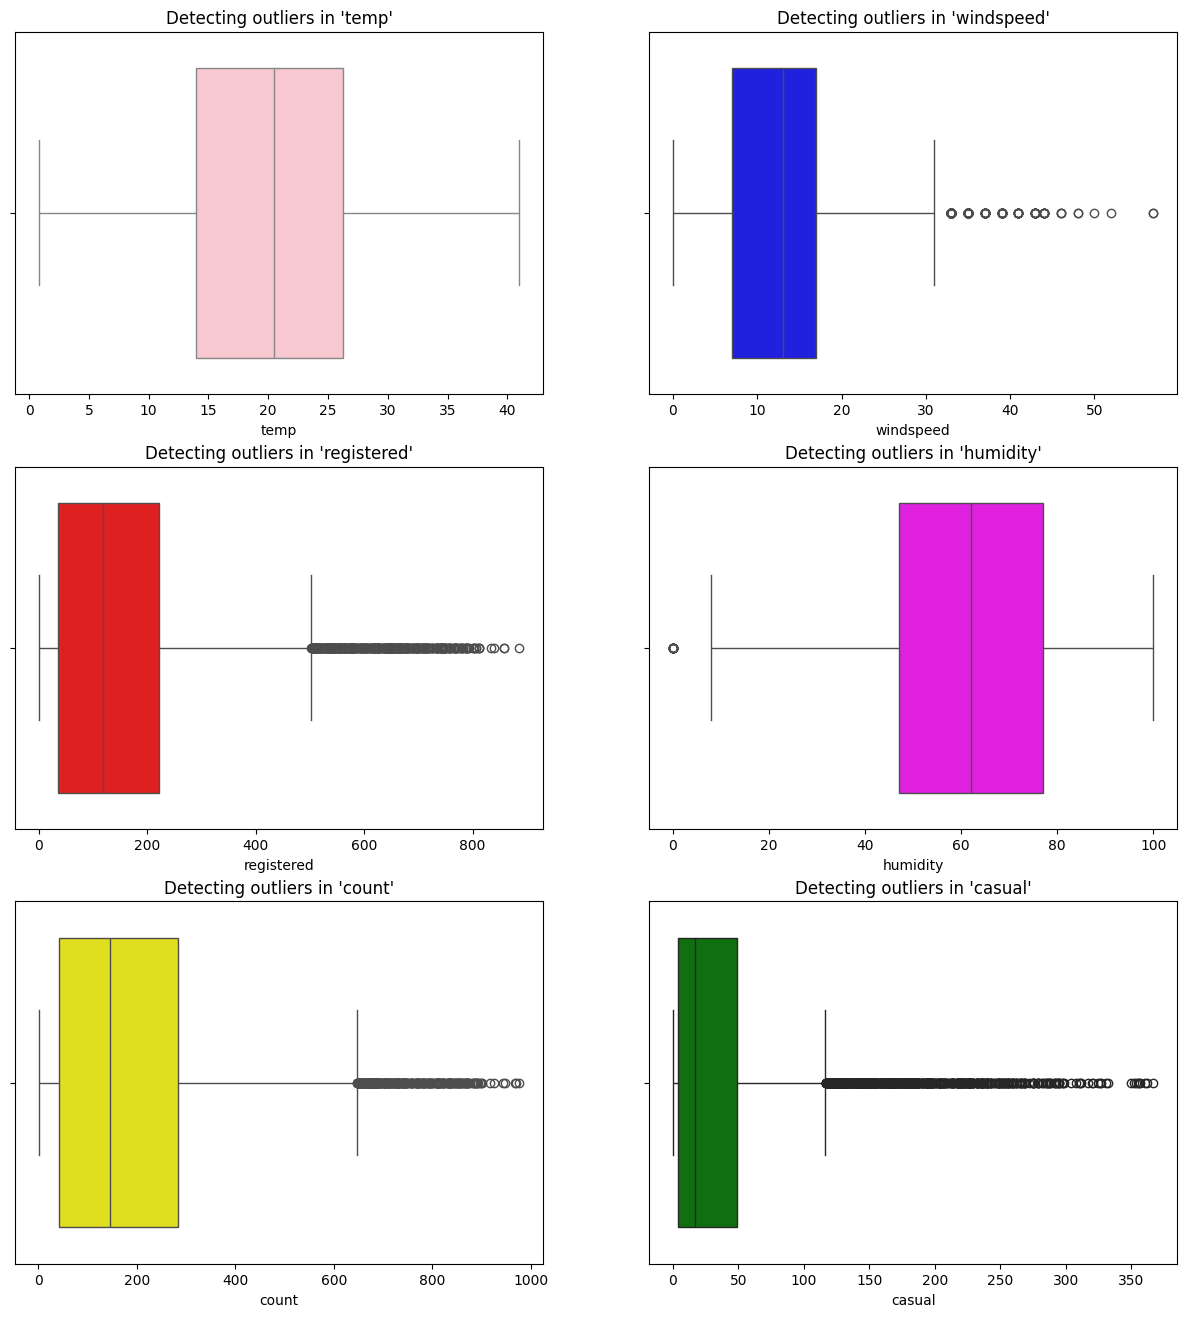

In [ ]:
columns = ['temp','windspeed','registered','humidity','count','casual']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'yellow', 'pink'])
count = 1
plt.figure(figsize=(15,16))
for i in columns:
  plt.subplot(3,2,count)
  sns.boxplot(data=df, x=i,color = colors[count-1])
  plt.title(f"Detecting outliers in '{i}'")
  count = count + 1

plt.show()

In [ ]:
q75 = np.percentile(df['windspeed'], 75)
q25 = np.percentile(df['windspeed'], 25)
windspeed_iqr = q75 - q25
windspeed_upper_whisker = q75 + (1.5 * windspeed_iqr)
print(f"The windspeed iqr is coming as {windspeed_iqr}")
print(f"The upper whisker of windspeed is coming as {windspeed_upper_whisker}")

q75 = np.percentile(df['casual'], 75)
q25 = np.percentile(df['casual'], 25)
casual_iqr = q75 - q25
casual_upper_whisker = q75 + (1.5 * casual_iqr)
print(f"The casual iqr is coming as {casual_iqr}")
print(f"The upper whisker of casual is coming as {casual_upper_whisker}")


The windspeed iqr is coming as 9.996400000000001
The upper whisker of windspeed is coming as 31.992500000000003
The casual iqr is coming as 45.0
The upper whisker of casual is coming as 116.5


**Insights**
- Temperature and Feeling Temperature have average values of 20.23°C and 23.66°C, respectively, with moderate deviations of 7.79 and 8.47.
- The average humidity is 61.89%, exhibiting variability between 47% and 77%.
- Windspeed averages at 12.80, ranging from 0 to 56.99, suggesting potential impacts on outdoor activities.
- Casual bike rentals average 36.02, with a maximum of 367, while registered rentals average 155.55, reaching a maximum of 886. The total count of bike rentals (casual + registered) has a mean of 191.57, with a maximum of 977.
- Usage patterns reveal a 25th percentile of 42, a median of 145, and a 75th percentile of 284.
- There are potential outliers in bike-related columns, where maximum values significantly exceed the 75th percentiles, possibly attributed to special events, holidays, or unusual circumstances.
- There are many outliers present in each of the columns : windspeed, casual, registered, count.

###Bivariate Analysis

- Relationship between important variables such as workday and count, season and count and weather and count

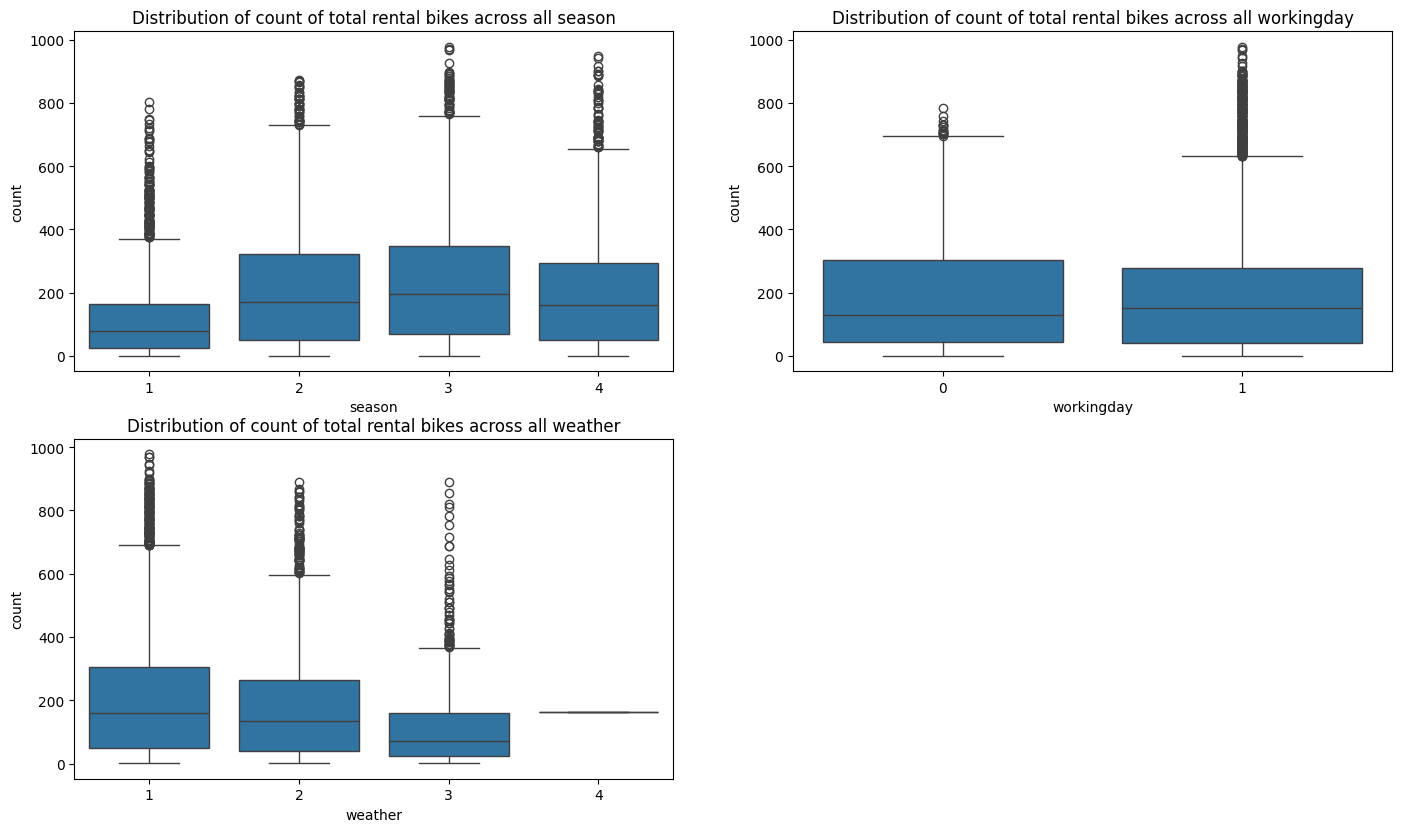

In [ ]:
columns=['season', 'workingday', 'weather']
plt.figure(figsize = (17, 15))
count=1
for data in columns:
  plt.subplot(3,2,count)
  plt.title(f'Distribution of count of total rental bikes across all {data}')
  sns.boxplot(data = df, x = data, y = 'count')
  count = count +1

plt.show()

**Insights**

*1. Season*
- The median demand is almost identical in summer, fall, and winter, but notably lower in spring.
- Outliers in demand are observed for all seasons, with a concentration in spring, mainly in the upper Inter Quartile Range (IQR).

*2. Holiday*

- Median demand is nearly the same for holidays and non-holidays.
- Outliers are absent during holidays, while non-holidays show outliers, predominantly in the upper IQR.


*3. Working Day*
- The median difference between working and non-working days is marginally significant.
- Outliers are present in vehicle demand on both working and non-working days.

*4. Weather*
- Median demand for counted vehicles is similar in clear/few clouds and misty/cloudy conditions.
- Demand during light snow/light rain is lower than in clear and mist conditions.
- Only one data point exists for heavy rain and thunderstorms, aligning with the expectation of lower ridership in such severe weather.
- Outliers are present in the upper IQR for all conditions, excluding heavy rain.

**Correlation using Heatmap**

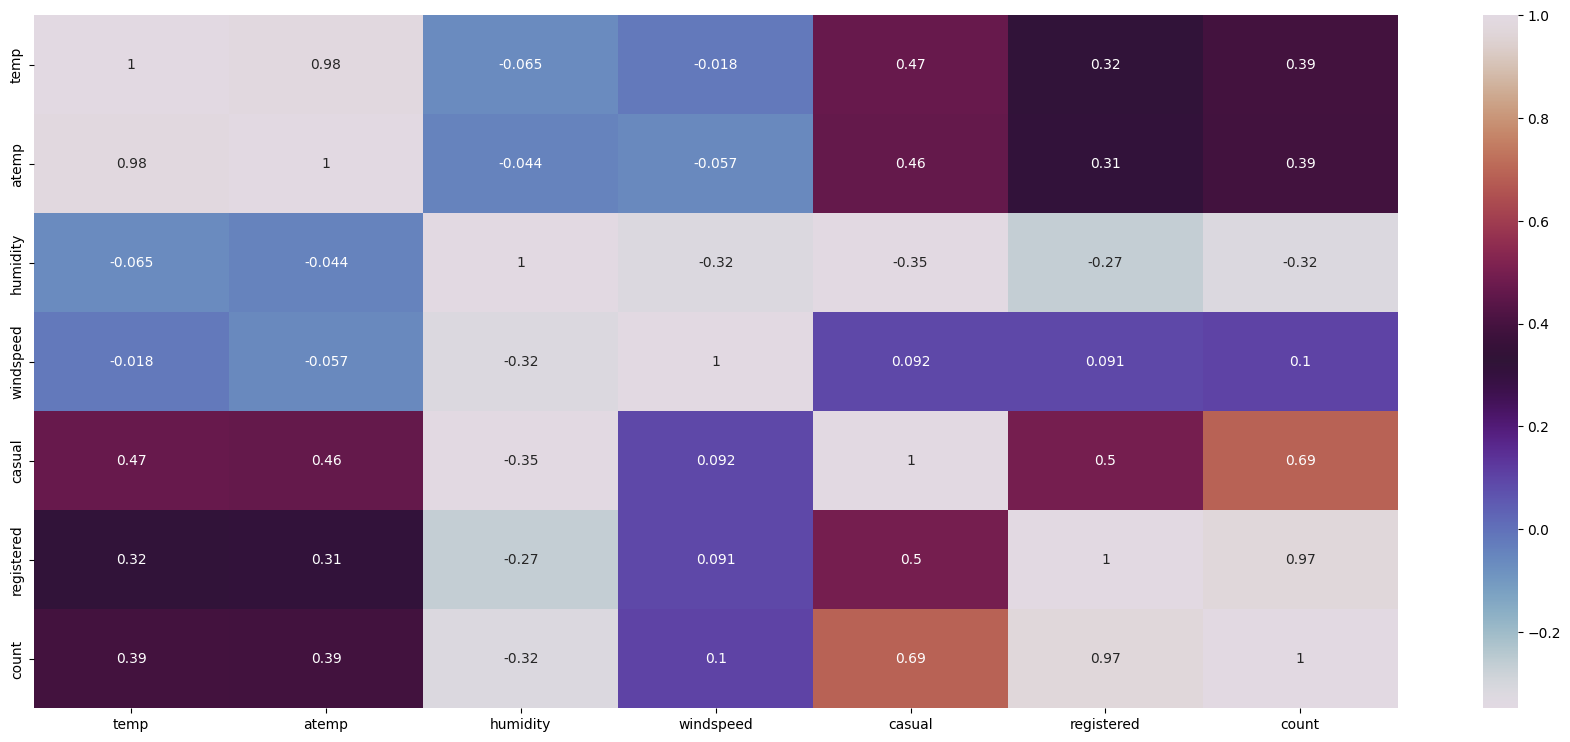

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(22, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap="twilight", xticklabels=1, yticklabels=1)
plt.show()

**Insights**
- Very High Corelation exists between columns [atemp, temp] and [count, registered]
- Negligible correlation exists between all other combinations of columns.
- High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.

**Pair Plot**

[]

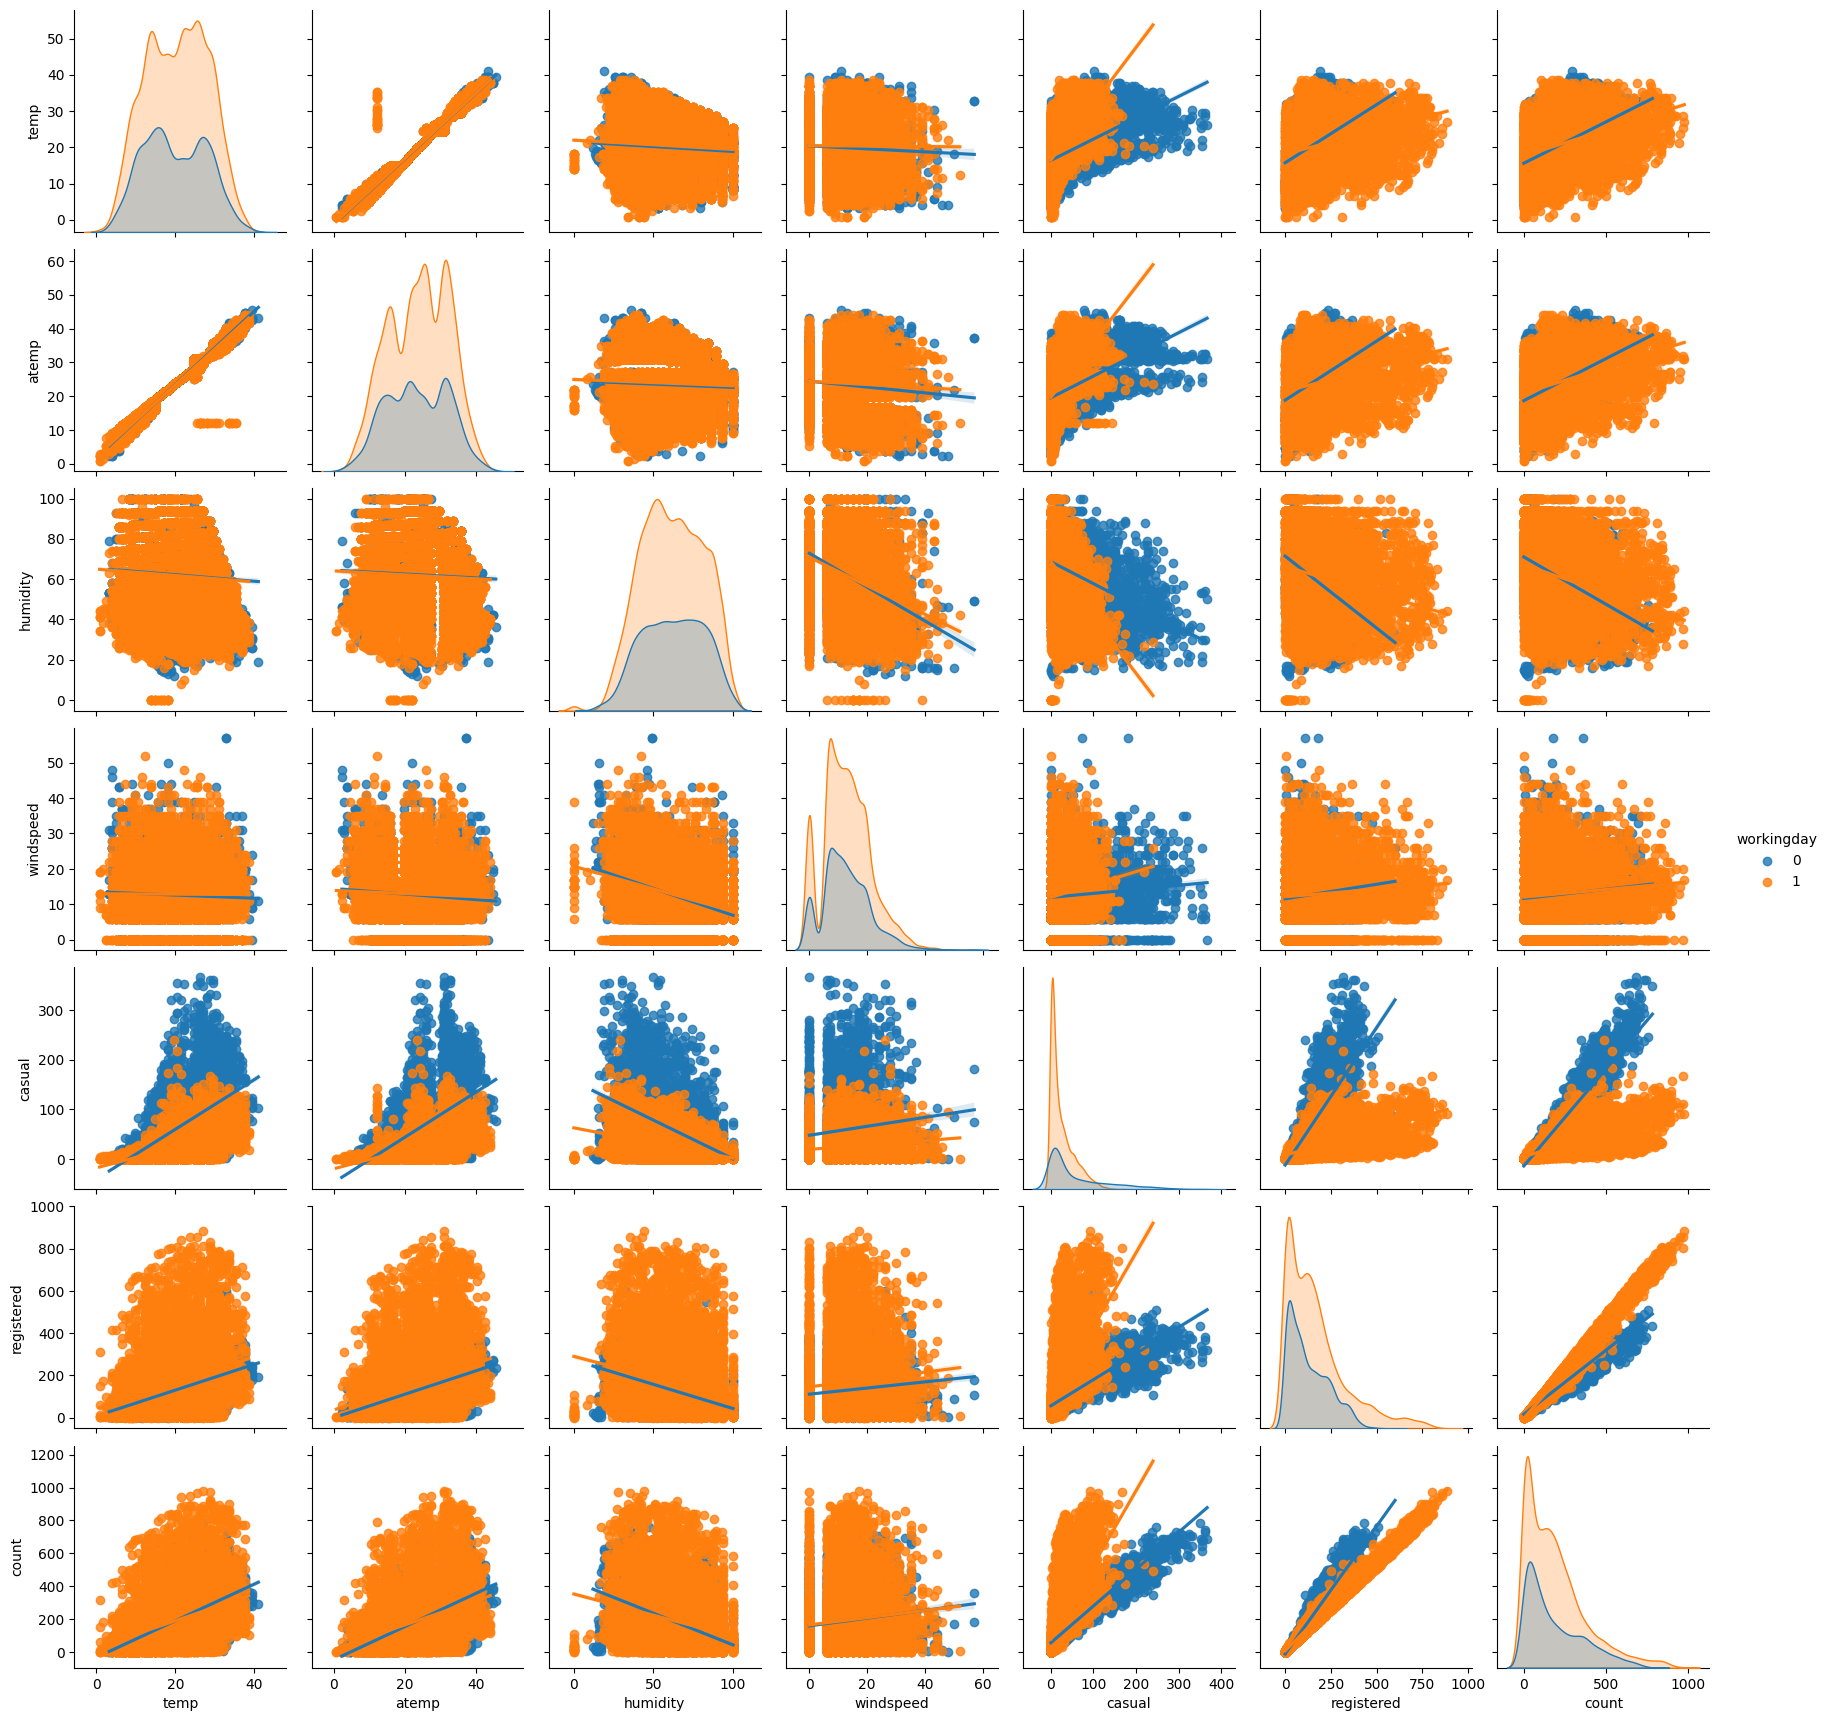

In [ ]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday')
plt.plot()

###Hypothesis Testing



**Sample T-Test to check if Working Day has an effect on number of electric cycles rented**

Null Hypothesis (Ho) - Variance of two groups are same - Working Day does not have any effect on the number of electric cycles rented.

Alternative Hypothesis (Ha) - Variance of two groups are different - Working Day has some effect on the number of electric cycles rented.

In [ ]:
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']
levene_stat, p_value = spy.levene(working_day.values, non_working_day.values)
print(p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis, Variances are not same")
else:
    print("Fail to Reject the Null hypothesis, Variances are same")


0.9437823280916695
Fail to Reject the Null hypothesis, Variances are same


**Next Step -**As we are fail to reject the null hypothesis for the variance so we can perform the independent sample T-Test

In [ ]:
t_stat, p_value = np.round(spy.ttest_ind(working_day.values, non_working_day.values), 2)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")
if p_value > 0.05:
    print("Accept Ho")
else:
    print("Reject Ho")

T-test statistic is 1.21 and p_value is 0.23
Accept Ho


**Insights**

As p-value is greater than the 0.05 so we cannot reject the null hypothesis. We don’t have proper evidence to say that working day has effect on the number of cycles being rented.

**ANNOVA to check if No. of cycles rented is similar or different in two variables**

 1. weather


 2. Season

Null Hypothesis : Number of Cycles rented is similar in different weather and season.

Alternate Hypothesis : Number of Cycles rented is not similar in different weather and season.

Significance Level (alpha) - 0.05

**Conditions to satisfy to perform the annova test**

- Normality check using QQ Plot.
- Homogeneity of Variance using Levene's Test
- Each observations are independent.

**Analyse different types of Season**

Text(0.5, 1.0, 'Winter')

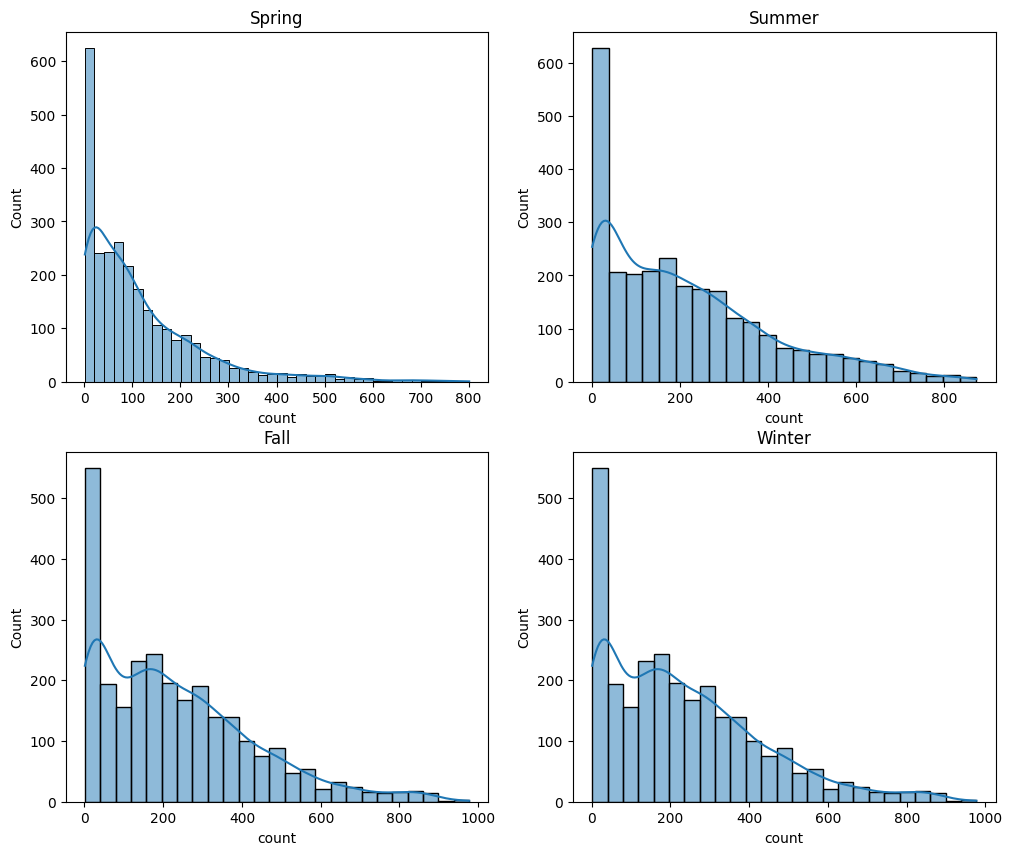

In [ ]:
plt.figure(figsize=(12,10))
season1 = df[df['season']==1][['count']]
plt.subplot(2,2,1)
sns.histplot(data=season1, x='count',kde=True)
plt.title("Spring")
season2 = df[df['season']==2][['count']]
plt.subplot(2,2,2)
sns.histplot(data=season2, x='count',kde=True)
plt.title("Summer")
season3 = df[df['season']==3][['count']]
plt.subplot(2,2,3)
sns.histplot(data=season3, x='count',kde=True)
plt.title("Fall")
season4 = df[df['season']==4][['count']]
plt.subplot(2,2,4)
sns.histplot(data=season3, x='count',kde=True)
plt.title("Winter")

**Analyse Different types of Weather**

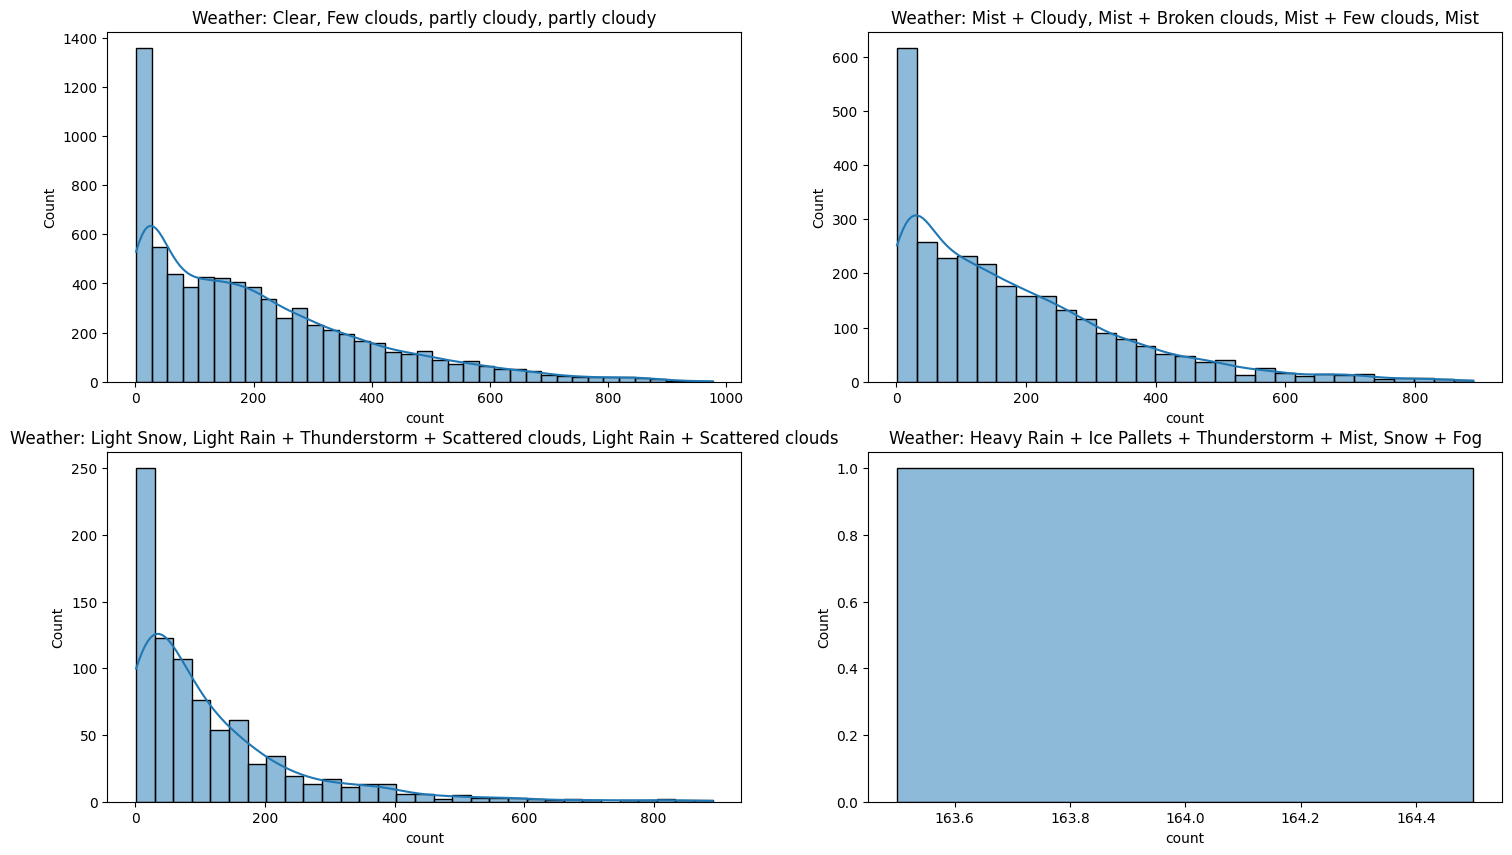

In [ ]:
plt.figure(figsize=(18,10))
weather_data1 = df[df['weather']==1][['count']]
plt.subplot(2,2,1)
sns.histplot(data=weather_data1, x='count',kde=True)
plt.title("Weather: Clear, Few clouds, partly cloudy, partly cloudy")
weather_data2 = df[df['weather']==2][['count']]
plt.subplot(2,2,2)
sns.histplot(data=weather_data2, x='count',kde=True)
plt.title("Weather: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist")
weather_data3 = df[df['weather']==3][['count']]
plt.subplot(2,2,3)
sns.histplot(data=weather_data3,x='count',kde=True)
plt.title("Weather: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds")
weather_data4 = df[df['weather']==4][['count']]
plt.subplot(2,2,4)
sns.histplot(data=weather_data4,x='count',kde=True)
plt.title("Weather: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")
plt.show()

**Insights**

As per direct visualization on the basis of above graphs it seems like distribution is not normal distribution so we need to do further analysis using the QQ Plot and Shapiro test.

**QQ Plot for Seasons**

[]

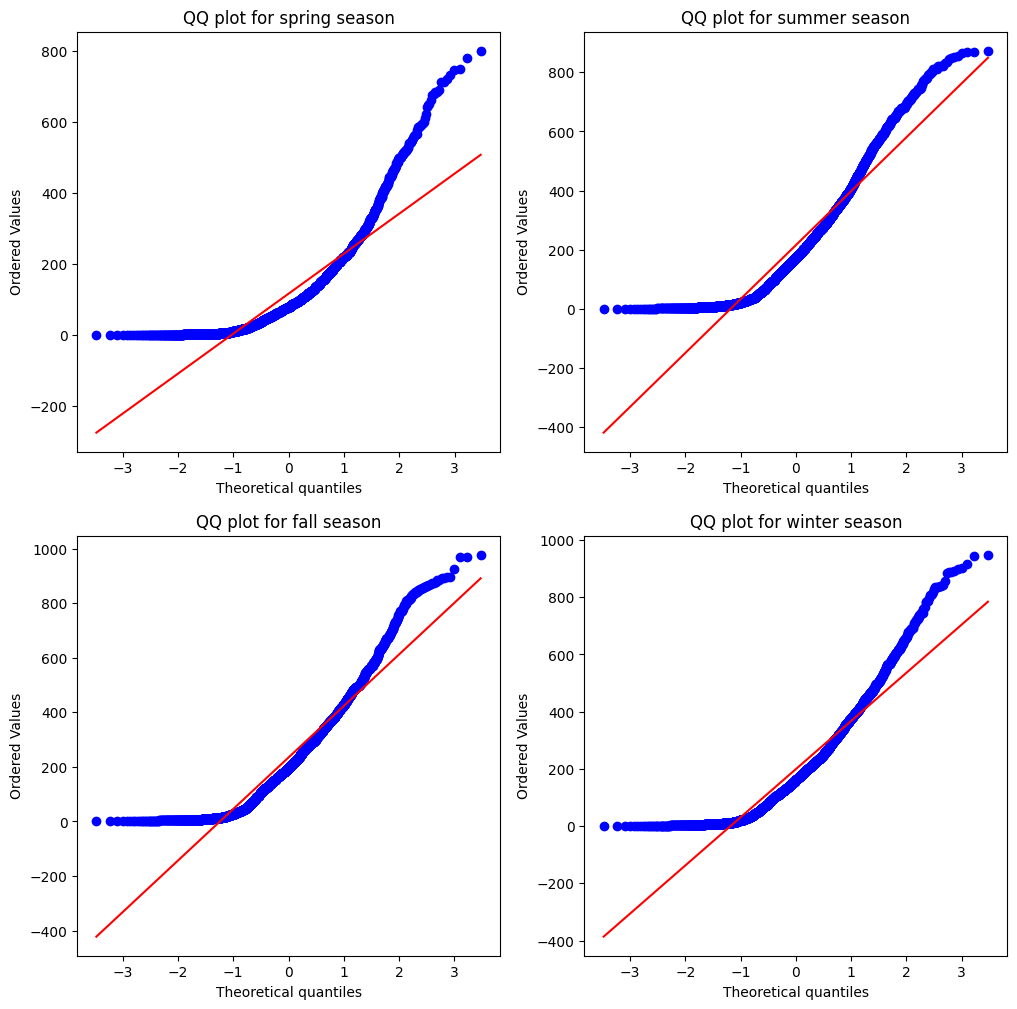

In [ ]:
df_season_spring = df.loc[df['season'] == 1, 'count']
df_season_summer = df.loc[df['season'] == 2, 'count']
df_season_fall = df.loc[df['season'] == 3, 'count']
df_season_winter = df.loc[df['season'] == 4, 'count']
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
spy.probplot(df_season_spring, plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')
plt.subplot(2, 2, 2)
spy.probplot(df_season_summer, plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')
plt.subplot(2, 2, 3)
spy.probplot(df_season_fall, plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')
plt.subplot(2, 2, 4)
spy.probplot(df_season_winter, plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

**QQ Plot for Weather**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[]

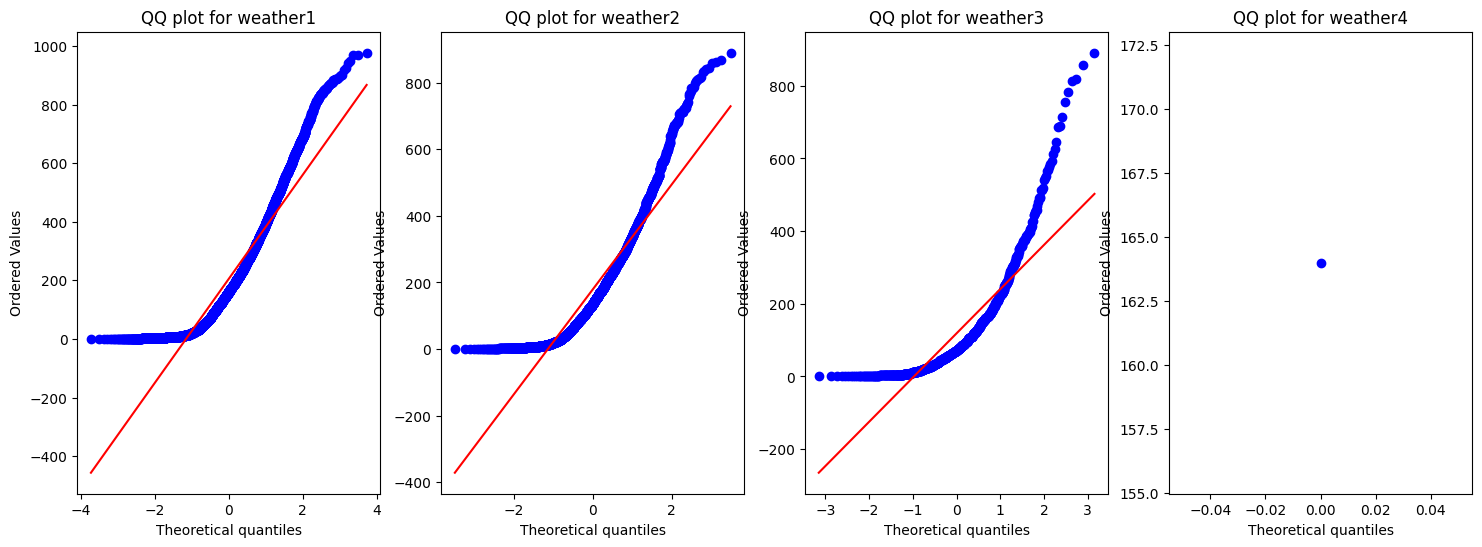

In [ ]:
from statsmodels.graphics.gofplots import qqplot
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
plt.figure(figsize = (18, 6))
plt.subplot(1, 4, 1)
spy.probplot(df_weather1.loc[:, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 4, 2)
spy.probplot(df_weather2.loc[:, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 4, 3)
spy.probplot(df_weather3.loc[:, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.subplot(1,4,4)
spy.probplot(df_weather4.loc[:,'count'], plot = plt, dist='norm')
plt.title('QQ plot for weather4')
plt.plot()

**Insights**

- As per the above visualization seasons and weather are not following the gaussian distributions.
- So just for more clarification just checking through shapiro’s test.

**Shapiro's Test to check Normal/Gaussian Distribution**

In [ ]:
test_stat, p_value = spy.shapiro(df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.749584618867662e-49
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.039374406270491e-39
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.043680518918597e-36
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1299244409282836e-39
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_weather1['count'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.5964921477006555e-57
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
test_stat, p_value = spy.shapiro(df_weather2['count'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.777839106111785e-43
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_weather3['count'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.875893017396149e-33
The sample does not follow normal distribution


**Insights**
- From Shapiro we also conclude the given distribution is not the normal distribution distribution.

**Checking the Variance using Leven's Test**

In [ ]:
leven_stat, p_value = spy.levene(df_weather1['count'],df_weather2['count'],df_weather3['count'],df_weather4['count'],df_season_spring,df_season_summer,df_season_fall,df_season_winter)
print(p_value)
if p_value < 0.05:
  print("Reject NUll Hypothesis, Variance are not equal")
else:
  print("Fail to reject the Null Hypothesis, Variance are equal")

3.463531888897594e-148
Reject NUll Hypothesis, Variance are not equal


**Insights**
- Since QQ Test, Shapiro's Test as well as Levene's Test has been failed so we cannot perform Anova Test. But as an alternative we can perform kruskal test.

**Performing Krusal Test**

In [ ]:
kruskal_stat, p_value = spy.kruskal(df_weather1['count'],df_weather2['count'],df_weather3['count'],df_weather4['count'],df_season_spring,df_season_summer,df_season_fall,df_season_winter)
print(f"P Value is coming as {p_value}")
if p_value<0.05:
  print(f"Since p-value is {p_value} less than 0.05, we reject the null hypothesis")

P Value is coming as 4.614440933900297e-191
Since p-value is 4.614440933900297e-191 less than 0.05, we reject the null hypothesis


**Insights**
- Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions.

**Chi-Square Test to see if the weather is dependent on season**

Null Hypotheses (Ho) - weather is independent of the seasons.

Alternate Hypothesis (Ha) - weather is dependent on the seasons.

We will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05.

Based on p-value, we will accept or reject H0.

p-val  >  alpha : Accept Ho

p-val  <  alpha : Reject Ho

In [ ]:
cross_table = pd.crosstab(df['season'],df['weather'])
cross_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['season'],df['weather'])
values = contingency_table.to_numpy()
chi2_stat, p_value, dof, expected_values = chi2_contingency(values)
print(f"Chi-test statistic is {chi2_stat} and p_value is {p_value}")

Chi-test statistic is 49.158655596893624 and p_value is 1.549925073686492e-07


In [ ]:
if p_value < 0.05:
  print("Weather is dependent on Seasons")
else:
  print("Weather is independent of Seasons")

Weather is dependent on Seasons


Since the p_value is smaller than the significance level, we can reject the Null Hypothesis.

**Insights**

The Chi-Squared test indicates a significant dependency between weather conditions and seasons.